In [ ]:
# Logistic Regression Model

In [68]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split
from load_dataset import*
%matplotlib inline

In [69]:
# Function for converting image to data

def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [70]:
# Function for Splitting the data into training and testing datasets

def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

In [71]:
# Set the value of num_pix
num_pix = 64

# Loading Dataset
datasets = load_dataset("car_dataset.hdf5")

# Training data
x = np.array(datasets["train"]["X"])
y = np.array(datasets["train"]["Y"])

# Development data
x1 = np.array(datasets["dev"]["X"])
y1 = np.array(datasets["dev"]["Y"])

In [72]:
# Checking the number of all examples

print("Number of training examples: ", x.shape[0])
print("Number of testing examples: ", x1.shape[0])
print("Height/Width of each image:", num_pix)
print (x.shape)
print (y.shape)
print (x1.shape)
print (y1.shape)

Number of training examples:  517
Number of testing examples:  172
Height/Width of each image: 64
(517, 64, 64, 3)
(517,)
(172, 64, 64, 3)
(172,)


In [73]:
# Reshaping, Flattening and Normalizing the data
flat_y = y.reshape(y.shape[0], -1).T
flat_y1 = y1.reshape(y1.shape[0], -1).T

train_set_yc = flat_y
test_set_yc = flat_y1

print ("train_set_y_f shape: " + str(flat_y.shape))
print ("test_set_y_f shape: " + str(flat_y1.shape))

flat_x = x.reshape(x.shape[0], -1).T
flat_x1 = x1.reshape(x1.shape[0], -1).T

print ("train_set_x shape: " + str(flat_x.shape))
print ("test_set_x shape: " + str(flat_x1.shape))

train_set_xc = flat_x/255
test_set_xc = flat_x1/255

train_set_y_f shape: (1, 517)
test_set_y_f shape: (1, 172)
train_set_x shape: (12288, 517)
test_set_x shape: (12288, 172)


In [74]:
# Sigmoid Function-

def sigmoid(z):
    
    s = 1/(1+ np.exp(-z))
    return s

In [75]:
# Initialization-

def initialize_with_zeros(dim):
     
    w = np.zeros(shape=(dim,1))
    b = 0.0
   
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [76]:
# Forward Propogation-

def forward_propogation(w,b,X,Y) :
    
    m = X.shape[1]  
   
    Z= np.dot(w.T,X)+b
    A = sigmoid(Z)     
    cost = (-1/m) * np.sum(Y* np.log(A)+ (1- Y) * np.log(1-A))  
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost,A,m

In [77]:
# Backward Propogation-

def backward_propogation(w,b,X,Y) :
    m = X.shape[1]  
    Z= np.dot(w.T,X)+b
    A = sigmoid(Z) 
    #A = forward_propogation(w,b,X,Y)
    dz = A - Y
    dw = (1/m)*np.dot(X,dz.T)
    db = (1/m)*np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    return dw,db

In [78]:
# Optimization Function-

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost= False) :
    
    costs = []
    for i in range(num_iterations) :

        cost,A,m = forward_propogation(w,b,X,Y)
        dw,db = backward_propogation(w,b,X,Y)

        w = w-learning_rate*dw
        b = b-learning_rate*db

        if i % 100 == 0:
                costs.append(cost)

        if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i,cost))

    return dw,db,w,b,costs
    

In [79]:
# Predict Function-

def predict(w, b, X_test):
    
    m = X_test.shape[1]
    w = w.reshape(X_test.shape[0], 1)
    Z= np.dot(w.T,X_test) + b
    A = sigmoid(Z)
    Y_prediction = np.around(A)
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [80]:
# Logistic Regression Model-

def model(X_train, Y_train, X_test, Y_test, num_iterations = 3000, learning_rate = 0.25, print_cost = False):
       
    # initialize parameters with zeros 
    n = X_train.shape[0]
    w, b = initialize_with_zeros(dim=n)
    
    # Gradient descent 
    dw,db,w,b,costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Predicting test/train set
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [81]:
# Printing the sizes of datasets

x = np.array(datasets["train"]["X"])
flat_x = x.reshape(x.shape[0], -1).T
train_set_xc1 = flat_x/255
print (train_set_xc1.shape)

y = np.array(datasets["train"]["Y"])
flat_y = y.reshape(y.shape[0], -1).T
train_set_yc1 = flat_y
print (train_set_yc1.shape)

x1 = np.array(datasets["test"]["X"])
flat_x1 = x1.reshape(x1.shape[0], -1).T
test_set_xc1 = flat_x1/255
print (test_set_xc1.shape)

y1 = np.array(datasets["test"]["Y"])
flat_y1 = y1.reshape(y1.shape[0], -1).T
test_set_yc1 = flat_y1
print (test_set_yc1.shape)

(12288, 517)
(1, 517)
(12288, 173)
(1, 173)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

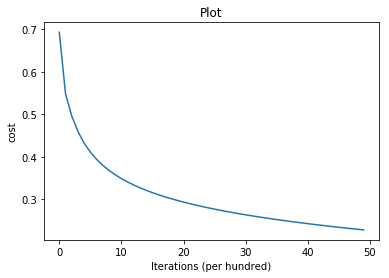

In [82]:
# Logistic Regression Model, Cost Function and it's Plot-

d = model(train_set_xc1, train_set_yc1, test_set_xc1, test_set_yc1,  num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

costs =np.squeeze(d['costs'])

plt.plot(costs)
plt.ylabel('Cost')
plt.title("Plot")
plt.xlabel('Iterations (per hundred)')
plt.show()

In [ ]:
# Deep Neural Network Classifier

In [83]:
# Importing the functions

import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
from dnn_utils_v2 import load_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
# Initialization-

def initialize_parameters_deep(layer_dims):
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [85]:
# Printing the value of all parameters

np.random.seed(3)
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = [[0.]
 [0.]
 [0.]]


In [86]:
# Forward Propogation for Deep Neural Network-

# import the linear_activation_forward
from dnn_utils_v2 import linear_activation_forward

def L_model_forward(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  
    
    # Implementing [LINEAR -> RELU]*(L-1).
    # Using a for loop to replicate [LINEAR->RELU] (L-1) times
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # This is the last layer L which uses sigmoid activation function
    # Implementing LINEAR -> SIGMOID. .
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    
    return AL, caches

In [87]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


In [88]:
# Importing cost function from the utility file
from dnn_utils_v2 import compute_cost

Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [89]:
# Backward Propogation for Deep Neural Network-

from dnn_utils_v2 import linear_activation_backward

def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    # Initializing the backward propagation
    dAL = - (np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        # using linear_activation_backward to get the derivatives
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        # saving the derivatives into a grads dictionary
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [90]:
# Printing the value of dW1, db1, dA1-

AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


In [91]:
# Printing the values of all parameters-

from dnn_utils_v2 import update_parameters
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [92]:
# Deep Neural Network Model Implementation-

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                         
    
    # Parameters initialization
    parameters = initialize_parameters_deep(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Computing cost.
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Updating parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Printing the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # Ploting the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [93]:
# Load the dataset and print their sizes
train_x_orig = train_set_xc1 
train_y = train_set_yc1
test_x_orig = test_set_xc1 
test_y = test_set_yc1 

print(train_x_orig.shape)
print(train_y.shape)
print(test_x_orig.shape)
print(test_y.shape)

(12288, 517)
(1, 517)
(12288, 173)
(1, 173)


Cost after iteration 0: 0.642773
Cost after iteration 100: 0.411428
Cost after iteration 200: 0.327570
Cost after iteration 300: 0.278502
Cost after iteration 400: 0.232496
Cost after iteration 500: 0.203679
Cost after iteration 600: 0.280351
Cost after iteration 700: 0.106251
Cost after iteration 800: 0.087284
Cost after iteration 900: 0.067336
Cost after iteration 1000: 0.204383
Cost after iteration 1100: 0.060864
Cost after iteration 1200: 0.046707
Cost after iteration 1300: 0.036495
Cost after iteration 1400: 0.029322
Cost after iteration 1500: 0.024356
Cost after iteration 1600: 0.020823
Cost after iteration 1700: 0.018232
Cost after iteration 1800: 0.016275
Cost after iteration 1900: 0.014755
Cost after iteration 2000: 0.013553
Cost after iteration 2100: 0.012586
Cost after iteration 2200: 0.011792
Cost after iteration 2300: 0.011131
Cost after iteration 2400: 0.010572
Cost after iteration 2500: 0.010095
Cost after iteration 2600: 0.009682
Cost after iteration 2700: 0.009321
Cost

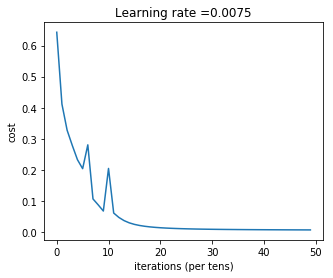

In [94]:
# Training the model-

layer_dims = [12288,15,10,7,1]
model_parameters = L_layer_model(train_x_orig, train_y, layer_dims, num_iterations = 5000, print_cost = True)

In [95]:
# Predict Function-

def predict(X, parameters):
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # Round the probabilities to get the class labels.
    probability = probas > 0.5
    p = probability.astype(float)
        
    return p

In [97]:
# Predictions-

predictions_train = predict(train_x_orig, model_parameters)
m_train = train_y.shape[1]
print("Train Accuracy: "  + str(np.sum((predictions_train == train_y)/m_train)))
m_test = test_y.shape[1]
predictions_test = predict(test_x_orig, model_parameters)
print("Test Accuracy: "  + str(np.sum((predictions_test == test_y)/m_test)))

Train Accuracy: 1.0000000000000002
Test Accuracy: 0.9017341040462425


In [ ]:
# Results-


# Cost for Logistic Regression after 5000 iterations and learning rate 0.0005 is 0.227881.
# Accuracy for Logistic Regression after 5000 iterations and learning rate 0.0005 is -
# train accuracy: 92.06963249516441 %
# test accuracy: 87.28323699421965 %

# Cost for Deep Neural Network with 3 hidden layers after 5000 iterations and learning rate 0.0075 is 0.031003.
# Accuracy Deep Neural Network with 3 hidden layers is -
# Train Accuracy: 99.03288201160545 %
# Test Accuracy: 90.17341040462425 %

# Hence, we can conclude that Deep Neural Network model is able to reduce the cost function to a lower value than Logistic Regression Model.
# Also, accuracy of Deep Neural Network model on testing data is around 90 %, whereas for the Logistic Regression Model is around 87 %.
# Hence, we can conclude that Deep Neural Network model is a better classifier than Logistic Regression classifier.